In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet
from utilities import split

In [17]:
def elastic_net_regression(df):
    df = df.drop(columns=['Quarter end'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna()
    X = df
    Y = X['Price']
    Y = Y[1:]
    
    #Getting Next Quarter %change of price 
    #This will be our target variable

    X = X[:-1]
    X = X.values
    Y = Y.values
    
    
    X_train, X_test, y_train, y_test = split( X, Y)
    X_train_means = np.mean(X_train, axis = 0)
    X_train_std = np.std(X_train, axis = 0)
    X_train_scaled = (X_train - X_train_means)/X_train_std
    
    #print(np.shape(X_train_scaled)[1])

    X_test_scaled = (X_test - X_train_means)/X_train_std
    # Import the model we are using
    reg = ElasticNet(random_state=0, max_iter = 2000)
    reg.fit(X_train_scaled, y_train)
    # Train the model on training data
    # Use the forest's predict method on the test data
    predictions = reg.predict(X_test_scaled)
    
    return predictions,y_test

In [18]:
filenames = open('filenames.txt','r').read()
filenames = filenames.split('\n')[:-1]

all_preds = {}
all_labels = {}

i = 0

#for i in range(15):
for i in range(len(filenames)):
    try:
        df = pd.read_csv("./new_clean_data/"+str(filenames[i]), delimiter = ',')
        preds,labels = elastic_net_regression(df)
        #preds = np.reshape(preds,(8,))
        all_preds[str(filenames[i])] = preds
        all_labels[str(filenames[i])] = labels
    except:
        s=2

/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/home/anshul/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


In [19]:
Predictions = pd.DataFrame.from_dict(all_preds, orient='index')
labels_df = pd.DataFrame.from_dict(all_labels, orient='index')
Predictions

,0,1,2,3,4,5,6,7
A_quarterly_financial_data.csv,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344,0.022344
AMR_quarterly_financial_data.csv,-0.016173,-0.016173,-0.016173,-0.016173,-0.016173,-0.016173,-0.016173,-0.016173
AAN_quarterly_financial_data.csv,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018,0.034018
AAPL_quarterly_financial_data.csv,0.070483,0.070483,0.070483,0.070483,0.070483,0.070483,0.070483,0.070483
ABMD_quarterly_financial_data.csv,0.062118,0.062118,0.062118,0.062118,0.062118,0.062118,0.062118,0.062118
ABT_quarterly_financial_data.csv,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958,0.017958
ADBE_quarterly_financial_data.csv,0.048914,0.048914,0.048914,0.048914,0.048914,0.048914,0.048914,0.048914
ADI_quarterly_financial_data.csv,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037,0.015037
ADM_quarterly_financial_data.csv,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471,0.022471
ADSK_quarterly_financial_data.csv,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797,0.041797


In [23]:
import matplotlib.pyplot as plt

def give_quarter_performance(Predictions,Labels,quarter):
    Q = Predictions[quarter]
    Q_labels = labels_df[quarter]
    Q = Q.sort_values(ascending=False)
    Q_top_30 = Q[:30]
    
    top_30_labels = []

    for index in Q_top_30.index:
        row = Q_labels.loc[str(index)]
        top_30_labels.append(row)
    
    labels_series = pd.Series(top_30_labels)
    final_df = pd.DataFrame({'Preds': Q_top_30.values,'Labels': labels_series.values},index=Q_top_30.index)
    
    return final_df

def quarter_performance(Quarter_result):    
    portfolio_start = 30
    portfolio_end = 0
    for value in Quarter_result['Labels'].values:
        portfolio_end = portfolio_end + 1 + value
    
    perfomance = ((portfolio_end-portfolio_start)/portfolio_start)*100
    return perfomance
        
def total_performance(num_quarters):
    total_returns = 100
    q_turnouts = [100]
    q_pers = []
    for quarter in range(num_quarters):
        Q_result = give_quarter_performance(Predictions,labels_df,quarter)
        Q_per = quarter_performance(Q_result)
        
        total_returns = total_returns * (1+(Q_per/100))
        print('Quarter :'+str(quarter+1)+'\t Result :' +str(Q_per)+' %')
        q_turnouts.append(total_returns)
        q_pers.append(Q_per)
    
    compounded_result = total_returns-100
    q_avg_return = pow(total_returns/100, 1/num_quarters) - 1
    CAGR = pow(total_returns/100, 1/(num_quarters/4)) - 1
    
    print('Compounded Result :'+str(compounded_result)+str(' %'))
    print('Quarterly Compounded Growth Rate :', q_avg_return*100, '%')
    print('Annual Compounded Growth Rate :', CAGR*100, '%')
    print('Sharpe Ratio :', pow(q_avg_return*100/np.std(q_pers),1/4))
    
    plt.figure(figsize=(10,5))
    plt.plot(q_turnouts)
    plt.ylabel('Portfolio Value')
    plt.xlabel('Quarters')
    plt.title('Elastic Net Regression Portfolio Performance')
    plt.show()

Quarter :1	 Result :7.562245639769524 %
Quarter :2	 Result :6.073424094431796 %
Quarter :3	 Result :6.403820629787566 %
Quarter :4	 Result :1.5901061859615242 %
Quarter :5	 Result :6.654146773953376 %
Quarter :6	 Result :-5.8277627506648475 %
Quarter :7	 Result :-3.5213932463231497 %
Quarter :8	 Result :7.58053401134499 %
Compounded Result :28.570235186848038 %
Quarterly Compounded Growth Rate : 3.1911743248958624 %
Annual Compounded Growth Rate : 13.388815668410636 %
Sharpe Ratio : 0.8950266221266773


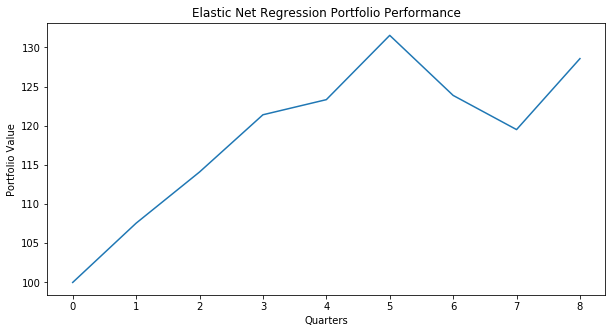

In [24]:
total_performance(8)

In [22]:
Predictions.to_csv('./Labels_and_Preds/Predictions_Elastic_Net.csv')